In [20]:
import pandas as pd
import datetime
from datetime import date
from datetime import datetime
import numpy as np
from tqdm import tqdm
import pickle

### one year(2016) example for first time inspection on different stations

In [7]:
#data read in
data_list=[]
years=[2015,2016]
for year in years:
    for i in range(9):
        i+=1
        #print(i)
        if i== 6:
            file=pd.read_csv('emission-test-{}-0{}.csv'.format(year,6), 
                             skiprows=[467003], 
                             usecols=['VIN','OVERALL_EMISSION_RESULT','TEST_DATE','EMISSION_TEST_TYPE_ID','STATION_ID','TEST_TYPE'])
        else:
            file=pd.read_csv('emission-test-{}-0{}.csv'.format(year,i), usecols=['VIN','OVERALL_EMISSION_RESULT','TEST_DATE','EMISSION_TEST_TYPE_ID','STATION_ID','TEST_TYPE'])
        data_list.append(file)
months=[10,11,12]
for year in years:
    for month in months:
        file=pd.read_csv('emission-test-{}-{}.csv'.format(year,month),usecols=['VIN','OVERALL_EMISSION_RESULT','TEST_DATE','EMISSION_TEST_TYPE_ID','STATION_ID','TEST_TYPE'])
        data_list.append(file)
all_df=pd.concat(data_list, axis=0, ignore_index=True)    

In [8]:
#data clean

all_df=all_df[all_df['EMISSION_TEST_TYPE_ID'] == 'O']
all_df=all_df[all_df['TEST_TYPE'] == 'I']
all_df.dropna(axis=0, how='any', inplace=True)
all_df.drop_duplicates(['TEST_DATE','VIN'],'first', inplace = True)


dict_VIN=all_df['VIN'].value_counts().to_dict()
lst=[]
for key in dict_VIN:
    if len(key)==17 and key[0].isalnum():
        lst.append(key)
s = set(lst)
df = all_df[all_df.VIN.isin(s)]

In [9]:
df['TEST_DATE'] = pd.to_datetime(df['TEST_DATE'], format='%b-%d-%Y %H:%M:%S',
                                     errors='coerce')
df.sort_values(by=['TEST_DATE'], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df

,TEST_DATE,TEST_TYPE,STATION_ID,VIN,EMISSION_TEST_TYPE_ID,OVERALL_EMISSION_RESULT
102046,2015-01-01,I,K864,1GCCS14591K177574,O,P
104480,2015-01-01,I,D727,1GCEC14X44Z251891,O,P
37888,2015-01-01,I,DF83,1FAHP3K21CL413018,O,P
262809,2015-01-01,I,T05,4M2ZU55P0WUJ51074,O,P
61292,2015-01-01,I,1621,1FTFW1EV8AFA11958,O,P
...,...,...,...,...,...,...
11500706,2016-12-31,I,EK33,5N1AT2MVXEC763075,O,P
11421554,2016-12-31,I,6304,2T3BFREV8FW270422,O,P
11445994,2016-12-31,I,EE15,3N1CB51D02L584821,O,F
11399932,2016-12-31,I,KK58,2HGFA16529H351812,O,P


In [ ]:
#df.set_index('VIN').T.to_dict('list')

In [11]:
t_df = df['TEST_DATE'].groupby(df['VIN']).agg(lambda x: list(x))
r_df = df['OVERALL_EMISSION_RESULT'].groupby(df['VIN']).agg(lambda x: list(x))
s_df = df['STATION_ID'].groupby(df['VIN']).agg(lambda x: list(x))
t_df.to_dict()
r_df.to_dict()
s_df.to_dict()
merge_dict = {key: list(zip(t_df[key], r_df[key], s_df[key])) for key in t_df.keys()}

In [18]:
merge_dict

{'00000000000000000': [(Timestamp('2016-10-01 00:00:00'), 'P', 'P987')],
 '100000000010375WI': [(Timestamp('2015-02-26 00:00:00'), 'P', 'BN73'),
  (Timestamp('2016-02-11 00:00:00'), 'P', 'BN73')],
 '101NDS2J42M677618': [(Timestamp('2015-01-12 00:00:00'), 'P', '9548')],
 '101PC5SBXE7354343': [(Timestamp('2016-02-04 00:00:00'), 'P', 'EK45')],
 '103HV13T095816523': [(Timestamp('2016-01-22 00:00:00'), 'P', '8678')],
 '104GP21E968516129': [(Timestamp('2016-03-04 00:00:00'), 'P', 'K80')],
 '104GP24R758421565': [(Timestamp('2016-06-13 00:00:00'), 'P', 'T563')],
 '104GP25303B184442': [(Timestamp('2016-05-09 00:00:00'), 'P', 'M816')],
 '104GP253438103314': [(Timestamp('2016-09-06 00:00:00'), 'P', 'E014')],
 '104GP45393B247176': [(Timestamp('2015-03-13 00:00:00'), 'P', 'L66')],
 '104GP45R97B162378': [(Timestamp('2016-01-26 00:00:00'), 'P', 'EQ59')],
 '104HB48D84F206474': [(Timestamp('2016-01-18 00:00:00'), 'P', 'EY96')],
 '107HA16KX3J533279': [(Timestamp('2015-02-27 00:00:00'), 'P', 'A389')],
 '

In [19]:
import pickle
with open("two_years", "wb") as f:
    pickle.dump(merge_dict, f)

In [2]:
import pickle
with open("test_first", "rb") as f:
    test_first = pickle.load(f)

In [33]:
count=0
for key in merge_dict:
    count+=len(merge_dict[key])

In [75]:
c = 0
for key in test_first:
    for item in test_first[key]:
        c +=1
print(c)

17579029


### all records

In [10]:

time_dict_all = {}
for key in tqdm(merge_dict):
    l = len(merge_dict[key])
    for i in range(l):
        if i+1 < l:
            date1 = merge_dict[key][i][0]
            date2 = merge_dict[key][i+1][0]
            interval = int((date2 - date1).days/7)
            if key not in time_dict_all:
                time_dict_all[key] = [interval]
            else:
                time_dict_all[key].append(interval)

In [14]:
time_dict_all

{'100000000010375WI': [50],
 '107HW28K17S138427': [0],
 '12UFT82HX55181666': [0],
 '161PE5SB6G7185886': [2],
 '16MD11027FD010878': [50],
 '187GL22X6WS651526': [2],
 '18SS4FJ11H1003168': [0],
 '19UDE2F30GA008542': [38],
 '19UDE2F31GA008548': [53],
 '19UDE2F31GA012552': [54],
 '19UDE2F33GA011242': [51],
 '19UDE2F34GA000296': [61],
 '19UDE2F35GA002431': [45],
 '19UDE2F36GA007234': [42],
 '19UDE2F37GA008540': [28],
 '19UDE2F3XGA008581': [48],
 '19UDE2F3XGA011612': [45],
 '19UDE2F3XGA011982': [53],
 '19UDE2F3XGA017572': [1],
 '19UDE2F70GA000511': [54],
 '19UDE2F71GA007385': [43],
 '19UDE2F72GA008318': [18],
 '19UDE2F72GA016984': [0],
 '19UDE2F74GA007378': [36],
 '19UDE2F75GA000584': [49],
 '19UDE2F75GA001055': [0],
 '19UDE2F75GA001430': [54],
 '19UDE2F75GA001508': [45],
 '19UDE2F75GA002187': [45],
 '19UDE2F75GA016252': [43],
 '19UDE2F77GA005799': [55],
 '19UDE2F78GA010039': [40],
 '19UDE2F78GA015547': [18],
 '19UDE2F79GA001463': [49],
 '19UDE2F7XGA003626': [22],
 '19UDE2F7XGA018062': [52],


In [27]:
count1=0
count2=0
count3=0
count4=0
count5=0
count6=0
count7=0
count8=0
count9=0
count10=0
count11=0
count12=0
count13=0
count14=0
for key in time_dict_all:
    for i in time_dict_all[key]:
        if 0<i <=5:
            count1+=1
        elif 5<i <= 10:
            count2+=1
        elif 10<i <=15:
            count3+=1
        elif 15<i <=20:
            count4+=1
        elif 20<i <=25:
            count5+=1
        elif 25<i <=30:
            count6+=1
        elif 30<i <=35:
            count7+=1
        elif 35<i <=40:
            count8+=1
        elif 40<i<=45:
            count9+=1
        elif 45<i <=50:
            count10+=1
        elif 50<i <=55:
            count11+=1
        elif 55<i <=60:
            count12+=1
        elif 60<i <=65:
            count13+=1
        else:
            count14+=1

In [28]:
print(count1,count2,count3,count4,count5,count6,count7,count8,count9,count10,count11,count12,count13,count14)

78861 30276 29388 29809 28818 26423 26892 38898 156263 510173 1297685 458589 136159 174235


In [29]:
sum([count1,count2,count3,count4,count5,count6,count7,count8,count9,count10,count11,count12,count13,count14])

3022469

### P-P

In [12]:
def get_time_dict(x):
    time_dict = {}
    for key in tqdm(merge_dict):
        l = len(merge_dict[key])
        for i in range(l):
            if i+1 < l and merge_dict[key][i][1]==x and merge_dict[key][i+1][1]==y:
                date1 = merge_dict[key][i][0]
                date2 = merge_dict[key][i+1][0]
                interval = int((date2 - date1).days/7)
                if key not in time_dict:
                    time_dict[key] = [[interval,merge_dict[key][i][2],merge_dict[key][i+1][2]]]
                else:
                    time_dict[key].append([interval,merge_dict[key][i][2],merge_dict[key][i+1][2]])
    return time_dict

In [38]:
time_dict

{'100000000010375WI': [[50, 'BN73', 'BN73']],
 '16MD11027FD010878': [[50, '649', '649']],
 '19UDE2F30GA008542': [[38, 'M369', 'M369']],
 '19UDE2F31GA008548': [[53, 'M369', 'M369']],
 '19UDE2F31GA012552': [[54, 'M369', 'EW31']],
 '19UDE2F33GA011242': [[51, 'M369', '321']],
 '19UDE2F34GA000296': [[61, 'BM22', 'BM22']],
 '19UDE2F35GA002431': [[45, 'M369', '118']],
 '19UDE2F36GA007234': [[42, '4260', '9081']],
 '19UDE2F37GA008540': [[28, 'EF58', 'EF58']],
 '19UDE2F3XGA008581': [[48, 'M369', '370']],
 '19UDE2F3XGA011612': [[45, 'M369', 'M369']],
 '19UDE2F3XGA011982': [[53, 'M369', 'M369']],
 '19UDE2F70GA000511': [[54, 'B255', 'B255']],
 '19UDE2F71GA007385': [[43, '261', 'BJ97']],
 '19UDE2F72GA008318': [[18, 'B255', 'B255']],
 '19UDE2F74GA007378': [[36, 'EF58', 'EF58']],
 '19UDE2F75GA000584': [[49, 'M155', 'M155']],
 '19UDE2F75GA001430': [[54, 'A653', 'A653']],
 '19UDE2F75GA001508': [[45, 'B255', 'AK99']],
 '19UDE2F75GA016252': [[43, '118', '118']],
 '19UDE2F77GA005799': [[55, 'EF58', 'EF58'

In [27]:
def count_nr(time_dict):
    count1=0
    count2=0
    count3=0
    count4=0
    count5=0
    count6=0
    count7=0
    count8=0
    count9=0
    count10=0
    count11=0
    count12=0
    count13=0
    count14=0
    dict_5={}
    dict_10={}
    dict_15={}
    dict_20={}
    dict_25={}
    dict_30={}
    dict_35={}
    dict_40={}
    dict_45={}
    dict_50={}
    dict_55={}
    dict_60={}
    dict_65={}
    dict_70={}
    #lst_num = []
    #dict_lst = []
    for key in time_dict:
        for i in time_dict[key]:
            if 0<abs(i[0]) <=5:
                count1+=1
                dict_5[key] = time_dict[key]
            elif 5<abs(i[0]) <= 10:
                count2+=1
                dict_10[key] = time_dict[key]
            elif 10<abs(i[0]) <=15:
                count3+=1
                dict_15[key] = time_dict[key]
            elif 15<abs(i[0]) <=20:
                count4+=1
                dict_20[key] = time_dict[key]
            elif 20<abs(i[0]) <=25:
                count5+=1
                dict_25[key] = time_dict[key]
            elif 25<abs(i[0]) <=30:
                count6+=1
                dict_30[key] = time_dict[key]
            elif 30<abs(i[0]) <=35:
                count7+=1
                dict_35[key] = time_dict[key]
            elif 35<abs(i[0]) <=40:
                count8+=1
                dict_40[key] = time_dict[key]
            elif 40<abs(i[0]) <=45:
                count9+=1
                dict_45[key] = time_dict[key]
            elif 45<abs(i[0]) <=50:
                count10+=1
                dict_50[key] = time_dict[key]
            elif 50<abs(i[0]) <=55:
                count11+=1
                dict_55[key] = time_dict[key]
            elif 55<abs(i[0]) <=60:
                count12+=1
                dict_60[key] = time_dict[key]
            elif 60<abs(i[0]) <=65:
                count13+=1
                dict_65[key] = time_dict[key]
            else:
                count14+=1
                dict_70[key] = time_dict[key]
    
    return count1,count2,count3,count4,count5,count6,count7,count8,count9,count10,count11,count12,count13,count14, dict_5, dict_10, dict_15, dict_20, dict_25, dict_30, dict_35, dict_40, dict_45, dict_50, dict_55, dict_60, dict_65, dict_70


In [40]:
print(count1,count2,count3,count4,count5,count6,count7,count8,count9,count10,count11,count12,count13,count14)

19240 21280 24835 26381 26130 24192 24734 36176 147769 482492 1221046 423607 124278 79019


In [32]:
sum([count1,count2,count3,count4,count5,count6,count7,count8,count9,count10,count11,count12,count13,count14])

2681179

In [13]:
def num_dif(d,i,j):
    num_dif_station=0
    for key in d:
        for row in d[key]:
            if i<row[0]<=j:
                if row[1]!=row[2]:
                    num_dif_station+=1
    return num_dif_station

In [44]:
def get_prop():
    prop_lst=[]
    for i in range(13):
        j = (i+1)*5
        d = globals()['dict_{}'.format(j)]  
        num_dif_stations = num_dif(d,j-5,j)
        prop = num_dif_stations/globals()['count{}'.format(i+1)] 
        prop_lst.append(prop)
    return prop_lst    

In [45]:
def get_all_prop(dict_70, p_lst):
    num_dif_station_70 = 0
    for key in dict_70:
        for row in dict_70[key]:
            if 65<row[0]:
                if row[1]!=row[2]:
                    num_dif_station_70+=1
    #print(num_dif_station_70/count14)       
    p_lst.append(num_dif_station_70/count14)
        
    return p_lst

In [105]:
p_lst

[0.7275467775467775,
 0.7410244360902256,
 0.7224078920877793,
 0.6963344831507524,
 0.6776884806735552,
 0.6929150132275133,
 0.6984717393062182,
 0.5843653250773994,
 0.37328533048203616,
 0.32711215937259064,
 0.3586638013637488,
 0.4351698626321095,
 0.48383462881604145,
 0.576924537136638]

### P-P

In [49]:
# get time_dict with filter of 'F' &'P'
time_dict_f_p = get_time_dict('P','P')

# get numbers of count in each bin, for F & P
# and a dict for each bin for counting num of diff stations in each bin afterwards
# update count and dict_{} for F & P
count1,count2,count3,count4,count5,count6,count7,count8,count9,count10,count11,count12,count13,count14, dict_5, dict_10, dict_15, dict_20, dict_25, dict_30, dict_35, dict_40, dict_45, dict_50, dict_55, dict_60, dict_65, dict_70 = count_nr(time_dict_f_p)

# get percentage of num of diff stations in each bin as a list
prop_lst_f_p = get_prop()
all_lst = get_all_prop(dict_70, prop_lst_f_p)

100%|██████████| 5597872/5597872 [01:55<00:00, 48435.01it/s]


In [50]:
print(all_lst)
print(count1,count2,count3,count4,count5,count6,count7,count8,count9,count10,count11,count12,count13,count14)

[0.7275467775467775, 0.7410244360902256, 0.7224078920877793, 0.6963344831507524, 0.6776884806735552, 0.6929150132275133, 0.6984717393062182, 0.5843653250773994, 0.37328533048203616, 0.32711215937259064, 0.3586638013637488, 0.4351698626321095, 0.48383462881604145, 0.576924537136638]
19240 21280 24835 26381 26130 24192 24734 36176 147769 482492 1221046 423607 124278 79019


In [63]:
def get_time_dict(x):
    time_dict = {}
    for key in tqdm(merge_dict):
        l = len(merge_dict[key])
        for i in range(l):
            if i+1 < l and merge_dict[key][i][1]!= x and merge_dict[key][i+1][1]==x:
                date1 = merge_dict[key][i][0]
                date2 = merge_dict[key][i+1][0]
                interval = int((date2 - date1).days/7)
                if key not in time_dict:
                    time_dict[key] = [[interval,merge_dict[key][i][2],merge_dict[key][i+1][2]]]
                else:
                    time_dict[key].append([interval,merge_dict[key][i][2],merge_dict[key][i+1][2]])
    return time_dict

### F or N-P

In [64]:
# get time_dict with filter of 'F' &'P'
time_dict_f_p = get_time_dict('P')

# get numbers of count in each bin, for F & P
# and a dict for each bin for counting num of diff stations in each bin afterwards
# update count and dict_{} for F & P
count1,count2,count3,count4,count5,count6,count7,count8,count9,count10,count11,count12,count13,count14, dict_5, dict_10, dict_15, dict_20, dict_25, dict_30, dict_35, dict_40, dict_45, dict_50, dict_55, dict_60, dict_65, dict_70 = count_nr(time_dict_f_p)

# get percentage of num of diff stations in each bin as a list
prop_lst_f_p = get_prop()
all_lst = get_all_prop(dict_70, prop_lst_f_p)

100%|██████████| 5597872/5597872 [00:33<00:00, 167335.30it/s]


In [65]:
print(all_lst)
print(count1,count2,count3,count4,count5,count6,count7,count8,count9,count10,count11,count12,count13,count14)

[0.1786631585541565, 0.40950552088334136, 0.5446947674418605, 0.6213086276780544, 0.6672064777327935, 0.691160809371672, 0.7228637413394919, 0.6693306693306693, 0.4605077574047955, 0.4122257053291536, 0.43558282208588955, 0.5268695652173913, 0.5747463961558996, 0.030049945651426133]
47889 6249 2752 1727 1235 939 866 1001 2836 8932 23961 11500 3746 72679


In [66]:
def get_time_dict(x):
    time_dict = {}
    for key in tqdm(merge_dict):
        l = len(merge_dict[key])
        for i in range(l):
            if i+1 < l and merge_dict[key][i][1]== x and merge_dict[key][i+1][1]!=x:
                date1 = merge_dict[key][i][0]
                date2 = merge_dict[key][i+1][0]
                interval = int((date2 - date1).days/7)
                if key not in time_dict:
                    time_dict[key] = [[interval,merge_dict[key][i][2],merge_dict[key][i+1][2]]]
                else:
                    time_dict[key].append([interval,merge_dict[key][i][2],merge_dict[key][i+1][2]])
    return time_dict

### P-F or N

In [67]:
# get time_dict with filter of 'F' &'P'
time_dict_f_p = get_time_dict('P')

# get numbers of count in each bin, for F & P
# and a dict for each bin for counting num of diff stations in each bin afterwards
# update count and dict_{} for F & P
count1,count2,count3,count4,count5,count6,count7,count8,count9,count10,count11,count12,count13,count14, dict_5, dict_10, dict_15, dict_20, dict_25, dict_30, dict_35, dict_40, dict_45, dict_50, dict_55, dict_60, dict_65, dict_70 = count_nr(time_dict_f_p)

# get percentage of num of diff stations in each bin as a list
prop_lst_f_p = get_prop()
all_lst = get_all_prop(dict_70, prop_lst_f_p)

100%|██████████| 5597872/5597872 [00:24<00:00, 231641.52it/s]


In [68]:
print(all_lst)
print(count1,count2,count3,count4,count5,count6,count7,count8,count9,count10,count11,count12,count13,count14)

[0.726530612244898, 0.7797029702970297, 0.7311015118790497, 0.7511870845204178, 0.7360308285163777, 0.738430583501006, 0.7396226415094339, 0.6827253957329663, 0.4731993299832496, 0.4138948161164805, 0.45221850713898426, 0.536862584476756, 0.5969387755102041, 0.6801787916152897]
735 808 926 1053 1038 994 1060 1453 4776 15934 44264 19532 6860 6488


In [69]:
def get_time_dict(x):
    time_dict = {}
    for key in tqdm(merge_dict):
        l = len(merge_dict[key])
        for i in range(l):
            if i+1 < l and merge_dict[key][i][1]!= x and merge_dict[key][i+1][1]!=x:
                date1 = merge_dict[key][i][0]
                date2 = merge_dict[key][i+1][0]
                interval = int((date2 - date1).days/7)
                if key not in time_dict:
                    time_dict[key] = [[interval,merge_dict[key][i][2],merge_dict[key][i+1][2]]]
                else:
                    time_dict[key].append([interval,merge_dict[key][i][2],merge_dict[key][i+1][2]])
    return time_dict

### F or N -F or N 

In [70]:
# get time_dict with filter of 'F' &'P'
time_dict_f_p = get_time_dict('P')

# get numbers of count in each bin, for F & P
# and a dict for each bin for counting num of diff stations in each bin afterwards
# update count and dict_{} for F & P
count1,count2,count3,count4,count5,count6,count7,count8,count9,count10,count11,count12,count13,count14, dict_5, dict_10, dict_15, dict_20, dict_25, dict_30, dict_35, dict_40, dict_45, dict_50, dict_55, dict_60, dict_65, dict_70 = count_nr(time_dict_f_p)

# get percentage of num of diff stations in each bin as a list
prop_lst_f_p = get_prop()
all_lst = get_all_prop(dict_70, prop_lst_f_p)

100%|██████████| 5597872/5597872 [00:17<00:00, 325527.43it/s]


In [71]:
print(all_lst)
print(count1,count2,count3,count4,count5,count6,count7,count8,count9,count10,count11,count12,count13,count14)

[0.3175411475857052, 0.5074780814853017, 0.5794285714285714, 0.6620370370370371, 0.6795180722891566, 0.674496644295302, 0.6594827586206896, 0.6156716417910447, 0.31405895691609975, 0.26571936056838363, 0.28797242690753505, 0.400253164556962, 0.476078431372549, 0.043741043055642095]
10997 1939 875 648 415 298 232 268 882 2815 8414 3950 1275 16049


In [72]:
form = {'fp_c':[47889, 6249, 2752, 1727, 1235, 939, 866, 1001, 2836, 8932, 23961, 11500, 3746, 72679],
       'fp':[0.1786631585541565, 0.40950552088334136, 0.5446947674418605, 0.6213086276780544, 0.6672064777327935, 0.691160809371672, 0.7228637413394919, 0.6693306693306693, 0.4605077574047955, 0.4122257053291536, 0.43558282208588955, 0.5268695652173913, 0.5747463961558996, 0.030049945651426133],
       'pf_c': [735, 808, 926, 1053, 1038, 994, 1060, 1453, 4776, 15934, 44264, 19532, 6860, 6488],
       'pf': [0.726530612244898, 0.7797029702970297, 0.7311015118790497, 0.7511870845204178, 0.7360308285163777, 0.738430583501006, 0.7396226415094339, 0.6827253957329663, 0.4731993299832496, 0.4138948161164805, 0.45221850713898426, 0.536862584476756, 0.5969387755102041, 0.6801787916152897],
       'ff_c':[10997, 1939, 875, 648, 415, 298, 232, 268, 882, 2815, 8414, 3950, 1275, 16049],
        'ff':[0.3175411475857052, 0.5074780814853017, 0.5794285714285714, 0.6620370370370371, 0.6795180722891566, 0.674496644295302, 0.6594827586206896, 0.6156716417910447, 0.31405895691609975, 0.26571936056838363, 0.28797242690753505, 0.400253164556962, 0.476078431372549, 0.043741043055642095],
       
       }

In [73]:
form_ = pd.DataFrame(form)

In [74]:
form_.to_csv('file.csv')

### Penn failure rate calcu

In [11]:
def data_clean(df):
    # delete rows with any column having NaN value, just keeping data about OBD
    df.dropna(axis=0, how='any', inplace=True)
    df = df[(df['EMISSION_TEST_TYPE_ID'] == 'O')]
    df = df[(df['TEST_TYPE'] == 'I')]
    dict_VIN=df['VIN'].value_counts().to_dict()
    lst=[]
    for key in dict_VIN:
        if dict_VIN[key]<=2 and len(key)==17 and key[0].isalnum():
            lst.append(key)
    s = set(lst)
    df = df[df.VIN.isin(s)]
    # convert test_date type to numerical
    df['TEST_DATE'] = pd.to_datetime(df['TEST_DATE'], format='%b-%d-%Y %H:%M:%S',
                                     errors='coerce')
    
    df.dropna(axis=0, how='any', inplace=True)
    df.drop_duplicates('TEST_DATE','first', inplace = True)
    df.sort_values(by=['TEST_DATE'], inplace=True)
    return df      

In [12]:
def df_dict(df):
    dt_df = df['TEST_DATE'].groupby(df['VIN']).agg(lambda x: list(x))
    dr_df = df['OVERALL_EMISSION_RESULT'].groupby(df['VIN']).agg(lambda x: list(x))
    dt_df.to_dict()
    dr_df.to_dict()
    merge_dict = {key: list(zip(dt_df[key], dr_df[key])) for key in dt_df.keys()}
    return merge_dict

In [13]:
# global dict
global_dict={}

In [14]:
def add_global(d):
    for key in d:
        if key not in global_dict:
            global_dict[key]=d[key]
        else:
            global_dict[key].extend(d[key]) 
    return global_dict1

In [9]:
from tqdm.notebook import tqdm

In [16]:
for year in tqdm(range(2000,2017)):
    for i in range(1, 13):
        if i < 10:
            file=pd.read_csv('emission-test-{}-0{}.csv'.format(year,i), 
                             skiprows=[467003], 
                             usecols=['VIN','TEST_DATE','OVERALL_EMISSION_RESULT', 'EMISSION_TEST_TYPE_ID', 'VEHICLE_YEAR','TEST_TYPE'])
            df = data_clean(file)
            merge_dict = df_dict(df)
            global_dict1 = add_global(merge_dict)
            #file_merge = pd.concat([file_merge, file], axis=0, ignore_index=True)
        else:
            file=pd.read_csv('emission-test-{}-{}.csv'.format(year,i), 
                             skiprows=[467003], 
                             usecols=['VIN','TEST_DATE','OVERALL_EMISSION_RESULT', 'EMISSION_TEST_TYPE_ID', 'VEHICLE_YEAR','TEST_TYPE'])
            #file_merge = pd.concat([file_merge, file], axis=0, ignore_index=True)
            df = data_clean(file)
            merge_dict = df_dict(df)
            global_dict1 = add_global(merge_dict)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
import pickle
#with open("test_first", "wb") as f:
    #pickle.dump(global_dict, f)
    
with open("test_first", "rb") as f:
    global_dict2 = pickle.load(f)

In [3]:
global_dict2

{'1FAFP66L1XK128309': [(Timestamp('2001-01-01 00:00:00'), 'P'),
  (Timestamp('2004-06-09 08:45:54'), 'P'),
  (Timestamp('2005-02-25 07:33:07'), 'P'),
  (Timestamp('2007-01-22 09:27:06'), 'P'),
  (Timestamp('2008-02-11 13:53:11'), 'P'),
  (Timestamp('2008-08-01 07:55:32'), 'P')],
 '1N4DL01D0WC140458': [(Timestamp('2001-01-01 08:56:18'), 'P'),
  (Timestamp('2005-10-25 08:53:36'), 'P'),
  (Timestamp('2009-11-19 09:19:35'), 'P')],
 'JT3GP10V1X7049600': [(Timestamp('2001-01-01 09:10:06'), 'P')],
 'JM1TA222321732592': [(Timestamp('2001-11-08 01:10:13'), 'P'),
  (Timestamp('2004-03-02 13:03:11'), 'P'),
  (Timestamp('2006-03-20 18:15:58'), 'P'),
  (Timestamp('2009-03-14 10:00:35'), 'P')],
 'KNDUP131936413110': [(Timestamp('2001-11-07 23:33:55'), 'P'),
  (Timestamp('2004-03-25 09:18:08'), 'P'),
  (Timestamp('2005-03-16 09:17:35'), 'P'),
  (Timestamp('2006-04-07 10:37:02'), 'P'),
  (Timestamp('2008-04-09 15:30:53'), 'P'),
  (Timestamp('2009-04-25 10:35:20'), 'P')],
 '1B3E546C91D250664': [(Timest

In [25]:
from datetime import datetime

d11 = datetime.strptime("2001-01-01 08:56:18", "%Y-%m-%d %H:%M:%S")
d22 = datetime.strptime("2004-03-02 13:03:11", "%Y-%m-%d %H:%M:%S")
print(d11)
print((d22 - d11).days/7)
#format='%b-%d-%Y %H:%M:%S'
#"%Y-%m-%d %H:%M:%S"
type(d11)

2001-01-01 08:56:18
165.14285714285714


datetime.datetime

In [6]:
time_dict = {}
for key in tqdm(global_dict2):
    l = len(global_dict2[key])
    for i in range(l):
        if i+1 < l:
            date1 = global_dict2[key][i][0]
            date2 = global_dict2[key][i+1][0]
            interval = int((date2 - date1).days/7)
            if key not in time_dict:
                time_dict[key] = [(interval, global_dict2[key][i+1][1])]
            else:
                time_dict[key].append((interval, global_dict2[key][i+1][1]))

In [7]:
num_1=0
num_2=0
num_3=0
num_4=0
num_5=0
num_6=0
num_7=0
num_8=0
num_=0
num_11=0
num_22=0
num_33=0
num_44=0
num_55=0
num_66=0
num_77=0
num_88=0
num=0
for key in tqdm(time_dict):
    for item in time_dict[key]:
        if item[0] <= 10:
            num_1+=1
            if item[1] == 'F' or item[1] == 'N':
                num_11+=1
        elif 10 < item[0] <=20:
            num_2+=1
            if item[1] == 'F' or item[1] == 'N':
                num_22+=1
        elif 20 < item[0] <=30:
            num_3+=1
            if item[1] == 'F' or item[1] == 'N':
                num_33+=1
        elif 30 < item[0] <=40:
            num_4+=1
            if item[1] == 'F' or item[1] == 'N':
                num_44+=1
        elif 40 < item[0] <=50:
            num_5+=1
            if item[1] == 'F' or item[1] == 'N':
                num_55+=1
        elif 50 < item[0] <=60:
            num_+=1
            if item[1] == 'F' or item[1] == 'N':
                num+=1        
        elif 60 < item[0] <=70:
            num_6+=1
            if item[1] == 'F' or item[1] == 'N':
                num_66+=1
        elif 70 < item[0] <=80:
            num_7+=1
            if item[1] == 'F' or item[1] == 'N':
                num_77+=1
        else:
            num_8+=1
            if item[1] == 'F' or item[1] == 'N':
                num_88+=1
            
f1 = num_11/num_1         
f2 = num_22/num_2
f3 = num_33/num_3 
f4 = num_44/num_4 
f5 = num_55/num_5 
f = num/num_

f6 = num_66/num_6 
f7 = num_77/num_7
f8 = num_88/num_8
print(num_1+num_2+num_3+num_4+num_5+num_6+num_7+num_8+num_)


11094424


In [14]:
print(len(global_dict2))
print(len(time_dict))

6482219
4586114


In [8]:
print(f1,f2,f3,f4,f5,f,f6,f7,f8)

0.18550686786096912 0.11559528467178118 0.10720512865672167 0.09888770597871478 0.0726835651656436 0.07206287190240311 0.1004312084062396 0.13229011015415576 0.08631194271258882


In [9]:
print(num_1,num_2,num_3,num_4,num_5,num_,num_6,num_7,num_8)

375226 117574 170337 278973 2550838 5071391 537791 133177 1859117


#### Plot for failure rate

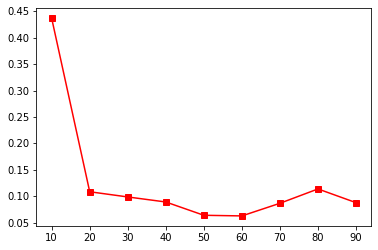

<BarContainer object of 9 artists>

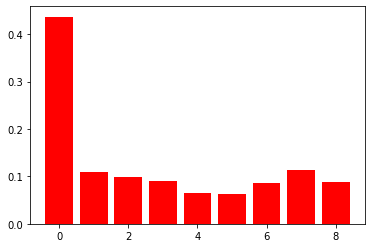

In [13]:
import matplotlib.pyplot as plt
x = [10,20,30,40,50,60,70,80,90]
y = [f1,f2,f3,f4,f5,f,f6,f7,f8]
plt.plot(x,y,'s-',color = 'r')#s-:方形
plt.show()
name_list=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','>80']

plt.bar(range(len(y)), y,fc = 'r')

In [20]:
num_g=0
for key in tqdm(global_dict2):
    num_g+=len(global_dict2[key])
print(num_g)


17805149


In [25]:
num_t=0
for key in tqdm(time_dict):
    num_t+=len(time_dict[key])
print(num_t)


11322930


#### Logistic Regression

In [32]:
x=[]
y=[]
for key in tqdm(time_dict):
    for item in time_dict[key]:
        x.append(item[0])
        if item[1] == 'P':
            y.append(1)
        else:
            y.append(0)

In [46]:
x_train=np.array(x)
y_train=np.array(y)
x1=x_train[:,np.newaxis]
y1=y_train[:,np.newaxis]
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=1.0, penalty='l2', tol=0.0001)
LR.fit(x1,y1)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
LR.score(x1,y1)

0.9117588821974524

In [50]:
LR.coef_

array([[0.01868102]])

In [51]:
LR.intercept_

array([1.338582])

In [ ]:
Log(P)=0.0186x+1.388